<a href="https://colab.research.google.com/github/ymuto0302/RW2025/blob/main/intro_pandas_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandasを用いた探索的データ解析の例

In [1]:
# データ可視化において日本語を表示したいため，japanize_matplotlib をインストール
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=06085f4747c7225948a808fb72816c69e00e80a8b34d928b2ec3dd646b15d1a6
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize_matplotlib


### パッケージのインポート

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from datetime import datetime, timedelta

### データの読み込み
一般的にデータはファイルから，またはデータベースから読み込まれるが，ここでは Python コードを用いてダミーデータを作成する。

In [10]:
# サンプルデータの生成
def build_sample_data():
    np.random.seed(42)
    dates = pd.date_range('2024-01-01', periods=365, freq='D')
    products = ['商品A', '商品B', '商品C', '商品D']
    regions = ['東京', '大阪', '名古屋', '福岡']

    # ランダムな売上データを作成
    data = []
    for _ in range(365):
        data.append({
            '日付': np.random.choice(dates),
            '商品': np.random.choice(products),
            '地域': np.random.choice(regions),
            '売上金額': np.random.randint(1000, 50000),
            '販売数量': np.random.randint(1, 20)
        })

    return data

# データの取得
data = build_sample_data()

# Pandas DataFrame へ変換
df = pd.DataFrame(data)

# 日付列を正しく設定
df['日付'] = pd.to_datetime(df['日付'])
df['月'] = df['日付'].dt.month

### データの一部を観察

In [11]:
# データの先頭５件を表示
df.head()

,日付,商品,地域,売上金額,販売数量,月
0,2024-04-12,商品D,東京,39158,11,4
1,2024-03-12,商品A,東京,7265,19,3
2,2024-08-02,商品C,名古屋,48191,4,8
3,2024-12-25,商品D,名古屋,2685,2,12
4,2024-12-09,商品D,大阪,3433,1,12


### データの統計情報を得る

In [12]:
# 基本的な統計情報
df.describe()

,日付,売上金額,販売数量,月
count,365,365.000000,365.000000,365.000000
mean,2024-07-10 14:47:40.273972480,25221.673973,10.052055,6.827397
min,2024-01-01 00:00:00,1206.000000,1.000000,1.000000
25%,2024-04-09 00:00:00,13183.000000,5.000000,4.000000
50%,2024-07-16 00:00:00,24714.000000,10.000000,7.000000
75%,2024-10-17 00:00:00,37980.000000,15.000000,10.000000
max,2024-12-30 00:00:00,49988.000000,19.000000,12.000000
std,NaN,14347.953584,5.651026,3.555728


### グループ集計

In [14]:
# グループ集計の例
print("\n=== 地域別月次売上 ===")
monthly_region = df.groupby(['地域', '月'])['売上金額'].sum().unstack(fill_value=0)
monthly_region


=== 地域別月次売上 ===


月,1,2,3,4,5,6,7,8,9,10,11,12
地域,,,,,,,,,,,,
名古屋,172346,159882,134310,94497,79195,151125,77652,270505,305536,125369,104912,282997
大阪,206329,185888,109094,148506,182338,352745,86825,207235,190855,197890,351634,194708
東京,199711,278284,136890,245647,213605,297079,249520,273746,164324,146304,204059,270290
福岡,134534,232976,154525,145447,28102,98248,103935,233505,192287,273576,166256,390688


### データの可視化

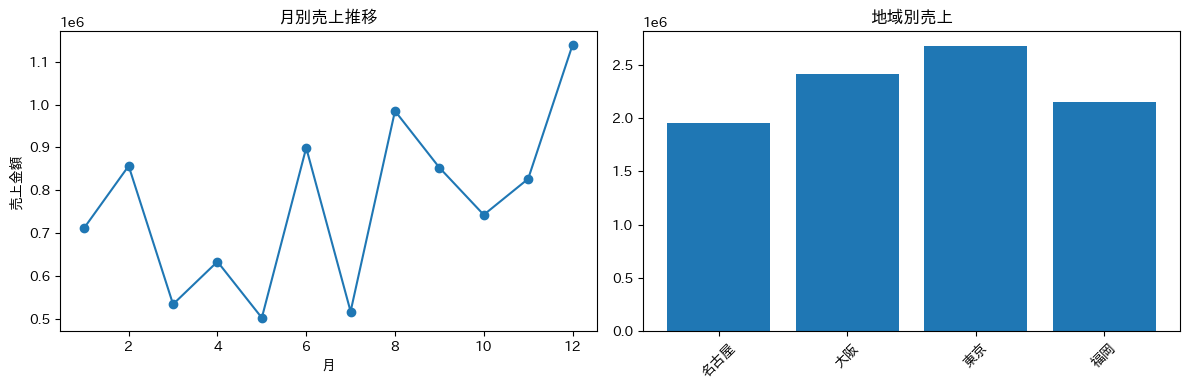

In [18]:
# データ可視化
plt.figure(figsize=(12, 4))

# 月別売上推移
plt.subplot(1, 2, 1)
monthly_sales = df.groupby('月')['売上金額'].sum()
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('月別売上推移')
plt.xlabel('月')
plt.ylabel('売上金額')

# 地域別売上比較
plt.subplot(1, 2, 2)
region_sales = df.groupby('地域')['売上金額'].sum()
plt.bar(region_sales.index, region_sales.values)
plt.title('地域別売上')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()